In [37]:
import os
import tensorflow as tf
# import tensorflowvisu
import math
import numpy as np
import matplotlib.pyplot as plt

In [82]:
dirs = ['imgs/birds/', 'imgs/sloppyjoes/']

In [115]:
def create_dataset_tensors(dirs, lim=50):
    filenames = []
    labels = []
    for i in range(len(dirs)):
        curr_dir = dirs[i]
        class_filenames = [curr_dir + val for val in os.listdir(curr_dir)[:lim]]
        labels += [i] * len(class_filenames)
        filenames += class_filenames

    # Reads an image from a file, decodes it into a dense tensor, and resizes it
    # to a fixed shape.
    def _parse_function(filename, label):
        image_string = tf.read_file(filename)
        image_decoded = tf.image.decode_image(image_string)
        image_decoded.set_shape([None, None, None])
        image_resized = tf.image.resize_images(image_decoded, [500, 500])
#         image_resized = tf.image.resize_image_with_crop_or_pad(image_decoded, 250, 250)
        return image_resized, label

    # A vector of filenames.
    filenames = tf.constant(filenames)

    # `labels[i]` is the label for the image in `filenames[i].
    labels = tf.constant(labels)

    dataset = tf.contrib.data.Dataset.from_tensor_slices((filenames, labels))
    dataset = dataset.map(_parse_function)
    dataset = dataset.shuffle(buffer_size=10000)
    return dataset

def show_batch(batch):
    images = batch[0]
    labels = batch[1]
    for im, label in zip(images, labels):
        plt.imshow(im.astype(np.uint8))
        print('Label: ' + str(label))
        plt.show()

In [116]:
dataset = create_dataset_tensors(dirs)
batched_dataset = dataset.batch(4)
iterator = batched_dataset.make_one_shot_iterator()
next_element = iterator.get_next()

In [122]:
output = sess.run(next_element)

Label: 0


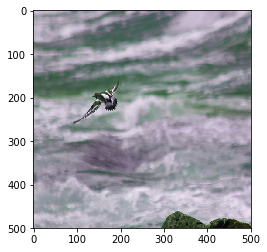

Label: 0


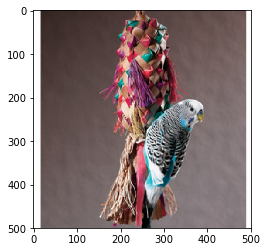

Label: 0


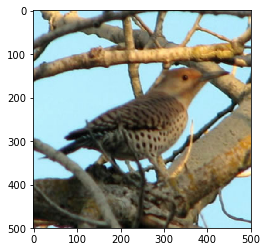

Label: 1


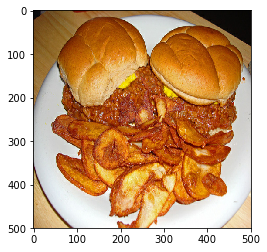

In [124]:
show_batch(output)

In [ ]:
W1 = tf.Variable(tf.truncated_normal([6, 6, 1, K], stddev=0.1))  # 6x6 patch, 1 input channel, K output channels
B1 = tf.Variable(tf.constant(0.1, tf.float32, [K]))
W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1))
B2 = tf.Variable(tf.constant(0.1, tf.float32, [L]))
W3 = tf.Variable(tf.truncated_normal([4, 4, L, M], stddev=0.1))
B3 = tf.Variable(tf.constant(0.1, tf.float32, [M]))

W4 = tf.Variable(tf.truncated_normal([7 * 7 * M, N], stddev=0.1))
B4 = tf.Variable(tf.constant(0.1, tf.float32, [N]))
W5 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1))
B5 = tf.Variable(tf.constant(0.1, tf.float32, [10]))

In [ ]:
W1 = 